In [ ]:
# research links

# https://shuzhanfan.github.io/2018/05/understanding-mathematics-behind-support-vector-machines/
# https://stackoverflow.com/questions/56153726/plot-k-nearest-neighbor-graph-with-8-features

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Analysis Docs

In [ ]:
# PY -> Packs/Year
# Hx or hx -> history
# Ds -> Disease
# T -> Tumor size
# L -> Lymph node involvement
# M -> Metastasis
# PSS -> Performance Status Scale
# RT -> Radiation Therapy
# LF -> Local Failure
# RF -> Regional Failure
# DF -> Distant Failure
# SC -> Second Cancer
# TI -> Time Interval
# TN -> Target Names

# HPV is the most common sexually transmitted infection
# Of the more than 100 types of HPV, about 40 types can spread through direct sexual contact to genital areas, as well as the mouth and throat.
# Oral HPV is transmitted to the mouth by oral sex, or possibly in other ways.
# Many people are exposed to oral HPV in their life.
# About 10% of men and 3.6% of women have oral HPV, and oral HPV infection is more common with older age.

# 6 types of cancer caused by HPV
#    - Cervix, vagina, and vulva in women
#    - Penile in men
#    - Anus and Oropharyngeal, including the base of the tongue and tonsils (oropharynx), in both women and men

# Symptoms
# Symptoms of oropharyngeal cancer may include a 
#      - long-lasting sore throat, 
#      - earaches, 
#      - hoarseness, 
#      - swollen lymph nodes, 
#      - pain when swallowing and 
#      - unexplained weight loss.

# Import Packages

In [78]:
# import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, accuracy_score, f1_score, classification_report,confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydot
from six import StringIO
import statsmodels.api as smApi
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
from pylab import rcParams

# Collecting Data

In [79]:
# read dataset.csv using pandas.read_csv function
# pandas.read_csv converts the dataset.csv into dataframe called Series Datatype

data = pd.read_excel("/content/gdrive/My Drive/datasets/oropharyngeal_cancer_risk_dataset.xlsx")

data.head()

,Trial PatientID,Age at diagnosis,Sex,ECOG Performance Status Scale,Smoking PY,Smoking Hx,Drinking hx,Ds Site,Subsite,T,N,M,Stage\n(AJCC 7th Edition),Path,HPV_p16 status (IHC),Primary Treatment,Chemotherapy,Time interval from the date of diagnosis to the RT start date (days),Time interval from the date of diagnosis to the RT end date (days),Dose (gy),Number of fractions,RT Tech,Time interval from the date of diagnosis to the date of last FU (days),Status,Cause of Death,Local Failure,Time interval from the date of diagnosis to the date of local failure (days),Regional Failure,Time interval from the date of diagnosis to the date of regional failure (days),Distant Failure,Time interval from the date of diagnosis to the date of distant failure (days),Second Primary,Time interval from the date of diagnosis to the date of 2nd cancer (days),PMID: 29506884 DOI: 10.1016/j.ijrobp.2018.01.057
0,Generated research ID for a participant in thi...,In years,Refers to Sex not Gender,https://ecog-acrin.org/resources/ecog-performa...,Calculated by the multiplying the number of ci...,Smoking History,Alcohol drinking history: \n<10 drinks per wee...,Disease site,Disease site: region within oropharynx,Tumor size by AJCC 7th Edition standard.,Lymph node involvement by AJCC 7th Edition sta...,Metastasis by AJCC 7th Edition standard.,Cancer stage by AJCC 7th Edition standard.,histopathological diagnosis,Assay Method Used: p16 Immunohistochemistry. E...,Radiation Therapy intent.,Contact the PI for more detail.,(days),(days),(Gray),NaN,IMRT-ipsilat=ipsilateral side to primary tumor...,(days),Vital status,NaN,NaN,(days),NaN,(days),NaN,(days),NaN,(days),This participant is part of the cohort describ...
1,OPC-00001,62.57,Female,ECOG 0,50,Ex-smoker,heavy,Oropharynx,post wall,T4b,N2c,M0,IVB,Squamous Cell Carcinoma,Negative,Radiation Therapy,none,35,70,60,25.0,IMRT,481,Dead,Other Cause,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OPC-00002,59.75,Female,ECOG 0,0,Non-smoker,non-drinker,Oropharynx,Tonsillar Fossa,T4b,N0,M0,IVB,Squamous Cell Carcinoma,Negative,Radiation Therapy,none,28,55,64,40.0,IMRT,3472,Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OPC-00003,60.96,Male,ECOG 0,5,Current,light,Oropharynx,Tonsillar Fossa,T2,N2a,M0,IVA,Squamous Cell Carcinoma,positive,Radiation Therapy,none,28,63,60,25.0,IMRT,4335,Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OPC-00004,59.73,Male,ECOG 0,40,Current,light,Oropharynx,Soft Palate,T3,N0,M0,III,Squamous Cell Carcinoma,positive,Radiation Therapy,none,41,76,64,40.0,IMRT,3274,Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,831,Yes


# Data Processing

In [80]:
# Drop the 0th index row from the dataframe

data.drop(0, inplace=True)

data.head()

,Trial PatientID,Age at diagnosis,Sex,ECOG Performance Status Scale,Smoking PY,Smoking Hx,Drinking hx,Ds Site,Subsite,T,N,M,Stage\n(AJCC 7th Edition),Path,HPV_p16 status (IHC),Primary Treatment,Chemotherapy,Time interval from the date of diagnosis to the RT start date (days),Time interval from the date of diagnosis to the RT end date (days),Dose (gy),Number of fractions,RT Tech,Time interval from the date of diagnosis to the date of last FU (days),Status,Cause of Death,Local Failure,Time interval from the date of diagnosis to the date of local failure (days),Regional Failure,Time interval from the date of diagnosis to the date of regional failure (days),Distant Failure,Time interval from the date of diagnosis to the date of distant failure (days),Second Primary,Time interval from the date of diagnosis to the date of 2nd cancer (days),PMID: 29506884 DOI: 10.1016/j.ijrobp.2018.01.057
1,OPC-00001,62.57,Female,ECOG 0,50,Ex-smoker,heavy,Oropharynx,post wall,T4b,N2c,M0,IVB,Squamous Cell Carcinoma,Negative,Radiation Therapy,none,35,70,60,25.0,IMRT,481,Dead,Other Cause,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OPC-00002,59.75,Female,ECOG 0,0,Non-smoker,non-drinker,Oropharynx,Tonsillar Fossa,T4b,N0,M0,IVB,Squamous Cell Carcinoma,Negative,Radiation Therapy,none,28,55,64,40.0,IMRT,3472,Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OPC-00003,60.96,Male,ECOG 0,5,Current,light,Oropharynx,Tonsillar Fossa,T2,N2a,M0,IVA,Squamous Cell Carcinoma,positive,Radiation Therapy,none,28,63,60,25.0,IMRT,4335,Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OPC-00004,59.73,Male,ECOG 0,40,Current,light,Oropharynx,Soft Palate,T3,N0,M0,III,Squamous Cell Carcinoma,positive,Radiation Therapy,none,41,76,64,40.0,IMRT,3274,Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,831,Yes
5,OPC-00005,68.72,Male,ECOG 0,40,Ex-smoker,non-drinker,Oropharynx,Base of Tongue,T3,N2c,M0,IVA,Squamous Cell Carcinoma,NaN,Radiation Therapy,Yes,41,89,70,35.0,IMRT,3663,Alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 1 to 606
Data columns (total 34 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Trial PatientID                                                                   606 non-null    object 
 1   Age at diagnosis                                                                  606 non-null    object 
 2   Sex                                                                               606 non-null    object 
 3   ECOG Performance Status Scale                                                     602 non-null    object 
 4   Smoking PY                                                                        606 non-null    object 
 5   Smoking Hx                                                                        606 non-null    object 
 6   Dr

In [ ]:
data.describe()

,Number of fractions
count,606.000000
mean,33.996700
std,4.311429
min,20.000000
25%,35.000000
50%,35.000000
75%,35.000000
max,45.000000


In [81]:
# remove unnecessary columns from dataframe
# also remove the null data columns.
# because we can't able to process the null data.
# that affects the accuracy of model

data.drop(['Trial PatientID', 'Cause of Death', 'Local Failure', 'Regional Failure', 'Distant Failure', 'Second Primary',
           'Time interval from the date of diagnosis to the date of last FU  (days)',
           'Time interval from the date of diagnosis to the date of  local failure (days)',
           'Time interval from the date of diagnosis to the date of  regional failure (days)',
           'Time interval from the date of diagnosis to the date of  distant failure (days)',
           'Time interval from the date of diagnosis to the date of 2nd cancer (days)',
           'PMID: 29506884 DOI: 10.1016/j.ijrobp.2018.01.057'
           ], 
          inplace=True, axis=1)

data.head()

,Age at diagnosis,Sex,ECOG Performance Status Scale,Smoking PY,Smoking Hx,Drinking hx,Ds Site,Subsite,T,N,M,Stage\n(AJCC 7th Edition),Path,HPV_p16 status (IHC),Primary Treatment,Chemotherapy,Time interval from the date of diagnosis to the RT start date (days),Time interval from the date of diagnosis to the RT end date (days),Dose (gy),Number of fractions,RT Tech,Status
1,62.57,Female,ECOG 0,50,Ex-smoker,heavy,Oropharynx,post wall,T4b,N2c,M0,IVB,Squamous Cell Carcinoma,Negative,Radiation Therapy,none,35,70,60,25.0,IMRT,Dead
2,59.75,Female,ECOG 0,0,Non-smoker,non-drinker,Oropharynx,Tonsillar Fossa,T4b,N0,M0,IVB,Squamous Cell Carcinoma,Negative,Radiation Therapy,none,28,55,64,40.0,IMRT,Alive
3,60.96,Male,ECOG 0,5,Current,light,Oropharynx,Tonsillar Fossa,T2,N2a,M0,IVA,Squamous Cell Carcinoma,positive,Radiation Therapy,none,28,63,60,25.0,IMRT,Alive
4,59.73,Male,ECOG 0,40,Current,light,Oropharynx,Soft Palate,T3,N0,M0,III,Squamous Cell Carcinoma,positive,Radiation Therapy,none,41,76,64,40.0,IMRT,Alive
5,68.72,Male,ECOG 0,40,Ex-smoker,non-drinker,Oropharynx,Base of Tongue,T3,N2c,M0,IVA,Squamous Cell Carcinoma,NaN,Radiation Therapy,Yes,41,89,70,35.0,IMRT,Alive


In [82]:
# rename the columns for better readable

data.rename(columns={'ECOG Performance Status Scale' : 'ECOG PSS',
                     'Time interval from the date of diagnosis to the RT start date (days)' : 'Start RT TI',
                     'Time interval from the date of diagnosis to the RT end date (days)' : 'End RT TI',
                     'Stage\n(AJCC 7th Edition)' : 'Stage', 'HPV_p16 status (IHC)' : 'HPV Status', 'M ' : 'M', 'Chemotherapy ' : 'Chemotherapy'
                     }, 
            inplace=True)

data.head()

,Age at diagnosis,Sex,ECOG PSS,Smoking PY,Smoking Hx,Drinking hx,Ds Site,Subsite,T,N,M,Stage,Path,HPV Status,Primary Treatment,Chemotherapy,Start RT TI,End RT TI,Dose (gy),Number of fractions,RT Tech,Status
1,62.57,Female,ECOG 0,50,Ex-smoker,heavy,Oropharynx,post wall,T4b,N2c,M0,IVB,Squamous Cell Carcinoma,Negative,Radiation Therapy,none,35,70,60,25.0,IMRT,Dead
2,59.75,Female,ECOG 0,0,Non-smoker,non-drinker,Oropharynx,Tonsillar Fossa,T4b,N0,M0,IVB,Squamous Cell Carcinoma,Negative,Radiation Therapy,none,28,55,64,40.0,IMRT,Alive
3,60.96,Male,ECOG 0,5,Current,light,Oropharynx,Tonsillar Fossa,T2,N2a,M0,IVA,Squamous Cell Carcinoma,positive,Radiation Therapy,none,28,63,60,25.0,IMRT,Alive
4,59.73,Male,ECOG 0,40,Current,light,Oropharynx,Soft Palate,T3,N0,M0,III,Squamous Cell Carcinoma,positive,Radiation Therapy,none,41,76,64,40.0,IMRT,Alive
5,68.72,Male,ECOG 0,40,Ex-smoker,non-drinker,Oropharynx,Base of Tongue,T3,N2c,M0,IVA,Squamous Cell Carcinoma,NaN,Radiation Therapy,Yes,41,89,70,35.0,IMRT,Alive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 1 to 606
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age at diagnosis     606 non-null    object 
 1   Sex                  606 non-null    object 
 2   ECOG PSS             602 non-null    object 
 3   Smoking PY           606 non-null    object 
 4   Smoking Hx           606 non-null    object 
 5   Drinking hx          606 non-null    object 
 6   Ds Site              606 non-null    object 
 7   Subsite              606 non-null    object 
 8   T                    606 non-null    object 
 9   N                    606 non-null    object 
 10  M                    606 non-null    object 
 11  Stage                606 non-null    object 
 12  Path                 606 non-null    object 
 13  HPV Status           504 non-null    object 
 14  Primary Treatment    606 non-null    object 
 15  Chemotherapy         606 non-null    obj

In [83]:
# now remove row from HPV_Status if HPV_Staus cantains the null row data

print(data.shape)

data.dropna(axis=0, inplace=True)

print(data.shape)

(606, 22)
(502, 22)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 1 to 606
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age at diagnosis     502 non-null    object 
 1   Sex                  502 non-null    object 
 2   ECOG PSS             502 non-null    object 
 3   Smoking PY           502 non-null    object 
 4   Smoking Hx           502 non-null    object 
 5   Drinking hx          502 non-null    object 
 6   Ds Site              502 non-null    object 
 7   Subsite              502 non-null    object 
 8   T                    502 non-null    object 
 9   N                    502 non-null    object 
 10  M                    502 non-null    object 
 11  Stage                502 non-null    object 
 12  Path                 502 non-null    object 
 13  HPV Status           502 non-null    object 
 14  Primary Treatment    502 non-null    object 
 15  Chemotherapy         502 non-null    obj

In [ ]:
data.head()

,Age at diagnosis,Sex,ECOG PSS,Smoking PY,Smoking Hx,Drinking hx,Ds Site,Subsite,T,N,M,Stage,Path,HPV Status,Primary Treatment,Chemotherapy,Start RT TI,End RT TI,Dose (gy),Number of fractions,RT Tech,Status
1,62.57,Female,ECOG 0,50,Ex-smoker,heavy,Oropharynx,post wall,T4b,N2c,M0,IVB,Squamous Cell Carcinoma,Negative,Radiation Therapy,none,35,70,60,25.0,IMRT,Dead
2,59.75,Female,ECOG 0,0,Non-smoker,non-drinker,Oropharynx,Tonsillar Fossa,T4b,N0,M0,IVB,Squamous Cell Carcinoma,Negative,Radiation Therapy,none,28,55,64,40.0,IMRT,Alive
3,60.96,Male,ECOG 0,5,Current,light,Oropharynx,Tonsillar Fossa,T2,N2a,M0,IVA,Squamous Cell Carcinoma,positive,Radiation Therapy,none,28,63,60,25.0,IMRT,Alive
4,59.73,Male,ECOG 0,40,Current,light,Oropharynx,Soft Palate,T3,N0,M0,III,Squamous Cell Carcinoma,positive,Radiation Therapy,none,41,76,64,40.0,IMRT,Alive
7,57.07,Female,ECOG 0,2,Ex-smoker,light,Oropharynx,Tonsillar Fossa,T1,N2a,M0,IVA,Squamous Cell Carcinoma,positive,Radiation Therapy,none,147,181,60,25.0,IMRT-ipsilat,Alive


In [ ]:
data.tail()

,Age at diagnosis,Sex,ECOG PSS,Smoking PY,Smoking Hx,Drinking hx,Ds Site,Subsite,T,N,M,Stage,Path,HPV Status,Primary Treatment,Chemotherapy,Start RT TI,End RT TI,Dose (gy),Number of fractions,RT Tech,Status
602,56.9639,Male,ECOG 1,60,Ex-smoker,non-drinker,Oropharynx,Tonsil,T3,N0,M0,III,Squamous Cell Carcinoma,Positive,Radiation Therapy,none,48,71,54.4,34.0,IMRT,Dead
603,66.1639,Female,ECOG 1,0,Non-smoker,non-drinker,Oropharynx,Base of Tongue,T4a,N0,M0,IVA,Squamous Cell Carcinoma,Negative,Radiation Therapy,Yes,42,87,70,35.0,IMRT,Alive
604,82.475,Female,ECOG 1,50,Ex-smoker,heavy,Oropharynx,Soft Palate,T2,N0,M0,II,Squamous Cell Carcinoma,Negative,Radiation Therapy,none,13,49,51,20.0,IMRT-ipsilat,Dead
605,80.5389,Male,ECOG 2,45,Ex-smoker,heavy,Oropharynx,Soft Palate,T2,N0,M0,II,Squamous Cell Carcinoma,Negative,Radiation Therapy,none,46,75,52.8,22.0,IMRT,Dead
606,53.7528,Male,ECOG 0,30,Ex-smoker,ex-drinker,Oropharynx,Tonsil Pillar,T1,N0,M0,I,Squamous Cell Carcinoma,Not tested,Radiation Therapy,none,91,116,51,20.0,IMRT-ipsilat,Dead


In [84]:
# get unique values from dataframe

print(np.unique(data['HPV Status']))

# print(len(data[data['HPV Status'] == 'Not tested']))
# print(len(data[data['HPV Status'] == 'no tissue']))

# print(data[data['HPV Status'] == 'Not tested'])
# print(data[data['HPV Status'] == 'no tissue'])

data['HPV Status'].replace({'no tissue' : 'Positive'}, inplace=True)
data['HPV Status'].replace({'  positive' : 'Positive'}, inplace=True)
data['HPV Status'].replace({'Positive -Strong' : 'Positive'}, inplace=True)
data['HPV Status'].replace({'Positive -focal' : 'Positive'}, inplace=True)
data['HPV Status'].replace({'  Negative' : 'Negative'}, inplace=True)

# print(data[data['Status'] == 'Alive'])

# not_tested = data.loc[:, 'HPV Status']

# print(not_tested[data['Status'] == 'Alive'].replace({'Not tested' : 'Negative'}))

# not_tested = not_tested[data['Status'] == 'Alive'].replace({'Not tested' : 'Negative'})
# not_tested = not_tested[data['Status'] == 'Dead'].replace({'Not tested' : 'Positive'})

# print(np.unique(not_tested))

# data['HPV Status'] = not_tested

# data['HPV Status'].replace({'Not tested' : 'Positive' if data['Status'] == 'Alive' else 'Negative'}, inplace=True)

# print('Positive' if [data['Status'] == 'Alive'][0] == True else 'Negative')

# print([data['Status'] == 'Alive'][0])

# data.loc[(data['Status'] == 'Alive'), 'HPV Status'] = 'Negative'
# data.loc[(data['Status'] == 'Dead'), 'HPV Status'] = 'Positive'

data.loc[(data['Status'] == 'Alive') & (data['HPV Status'] == 'Not tested'), 'HPV Status'] = 'Negative'
data.loc[(data['Status'] == 'Dead') & (data['HPV Status'] == 'Not tested'), 'HPV Status'] = 'Positive'

print(np.unique(data['HPV Status']))
# data['HPV Status'].tail()
# data.loc[data['Status'] == 'Dead', 'HPV Status']
# data.loc[data['HPV Status'] == 'Not tested', 'HPV Status']

['  Negative' '  positive' 'Negative' 'Not tested' 'Positive'
 'Positive -Strong' 'Positive -focal' 'no tissue']
['Negative' 'Positive']


In [85]:
# now the convert string labels columns into integer
# labels will give better accuracy
# use sklearn label_encoder to encode

label_encoder = LabelEncoder()

data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['ECOG PSS'] = label_encoder.fit_transform(data['ECOG PSS'])
data['Smoking Hx'] = label_encoder.fit_transform(data['Smoking Hx'])
data['Drinking hx'] = label_encoder.fit_transform(data['Drinking hx'])
data['Ds Site'] = label_encoder.fit_transform(data['Ds Site'])
data['Subsite'] = label_encoder.fit_transform(data['Subsite'])
data['T'] = label_encoder.fit_transform(data['T'])
data['N'] = label_encoder.fit_transform(data['N'])
data['M'] = label_encoder.fit_transform(data['M'])
data['Stage'] = label_encoder.fit_transform(data['Stage'])
data['Path'] = label_encoder.fit_transform(data['Path'])
data['Primary Treatment'] = label_encoder.fit_transform(data['Primary Treatment'])
data['Chemotherapy'] = label_encoder.fit_transform(data['Chemotherapy'])
data['RT Tech'] = label_encoder.fit_transform(data['RT Tech'])
data['Status'] = label_encoder.fit_transform(data['Status'])

# store both name and label value of target in the dataset, for future usage

hpv_status = data.loc[:, 'HPV Status']
data['HPV Status'] = label_encoder.fit_transform(data['HPV Status'])
data['HPV Status TN'] = hpv_status

data.head()

,Age at diagnosis,Sex,ECOG PSS,Smoking PY,Smoking Hx,Drinking hx,Ds Site,Subsite,T,N,M,Stage,Path,HPV Status,Primary Treatment,Chemotherapy,Start RT TI,End RT TI,Dose (gy),Number of fractions,RT Tech,Status,HPV Status TN
1,62.57,0,0,50,1,2,0,7,5,4,0,4,0,0,0,1,35,70,60,25.0,0,1,Negative
2,59.75,0,0,0,2,4,0,4,5,0,0,4,0,0,0,1,28,55,64,40.0,0,0,Negative
3,60.96,1,0,5,0,3,0,4,1,2,0,3,0,1,0,1,28,63,60,25.0,0,0,Positive
4,59.73,1,0,40,0,3,0,1,2,0,0,2,0,1,0,1,41,76,64,40.0,0,0,Positive
7,57.07,0,0,2,1,3,0,4,0,2,0,3,0,1,0,1,147,181,60,25.0,1,0,Positive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 1 to 606
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age at diagnosis     502 non-null    object 
 1   Sex                  502 non-null    int64  
 2   ECOG PSS             502 non-null    int64  
 3   Smoking PY           502 non-null    object 
 4   Smoking Hx           502 non-null    int64  
 5   Drinking hx          502 non-null    int64  
 6   Ds Site              502 non-null    int64  
 7   Subsite              502 non-null    int64  
 8   T                    502 non-null    int64  
 9   N                    502 non-null    int64  
 10  M                    502 non-null    int64  
 11  Stage                502 non-null    int64  
 12  Path                 502 non-null    int64  
 13  HPV Status           502 non-null    int64  
 14  Primary Treatment    502 non-null    int64  
 15  Chemotherapy         502 non-null    int

In [ ]:
data.dtypes

Age at diagnosis        object
Sex                      int64
ECOG PSS                 int64
Smoking PY              object
Smoking Hx               int64
Drinking hx              int64
Ds Site                  int64
Subsite                  int64
T                        int64
N                        int64
M                        int64
Stage                    int64
Path                     int64
HPV Status               int64
Primary Treatment        int64
Chemotherapy             int64
Start RT TI             object
End RT TI               object
Dose (gy)               object
Number of fractions    float64
RT Tech                  int64
Status                   int64
HPV Status TN           object
dtype: object

In [86]:
# some data columns is in object, so convert them into proper data type

data['Age at diagnosis'] = pd.to_numeric(data['Age at diagnosis'])
data['Smoking PY'] = pd.to_numeric(data['Smoking PY'])
data['Start RT TI'] = pd.to_numeric(data['Start RT TI'])
data['End RT TI'] = pd.to_numeric(data['End RT TI'])
data['Dose (gy)'] = pd.to_numeric(data['Dose (gy)'])

data.dtypes

Age at diagnosis       float64
Sex                      int64
ECOG PSS                 int64
Smoking PY             float64
Smoking Hx               int64
Drinking hx              int64
Ds Site                  int64
Subsite                  int64
T                        int64
N                        int64
M                        int64
Stage                    int64
Path                     int64
HPV Status               int64
Primary Treatment        int64
Chemotherapy             int64
Start RT TI              int64
End RT TI                int64
Dose (gy)              float64
Number of fractions    float64
RT Tech                  int64
Status                   int64
HPV Status TN           object
dtype: object

In [ ]:
print(data.shape)
print(data.columns)
data.describe()

(502, 23)
Index(['Age at diagnosis', 'Sex', 'ECOG PSS', 'Smoking PY', 'Smoking Hx',
       'Drinking hx', 'Ds Site', 'Subsite', 'T', 'N', 'M', 'Stage', 'Path',
       'HPV Status', 'Primary Treatment', 'Chemotherapy', 'Start RT TI',
       'End RT TI', 'Dose (gy)', 'Number of fractions', 'RT Tech', 'Status',
       'HPV Status TN'],
      dtype='object')


,Age at diagnosis,Sex,ECOG PSS,Smoking PY,Smoking Hx,Drinking hx,Ds Site,Subsite,T,N,M,Stage,Path,HPV Status,Primary Treatment,Chemotherapy,Start RT TI,End RT TI,Dose (gy),Number of fractions,RT Tech,Status
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.0,502.000000,502.000000,502.000000,502.0,502.000000,502.0,502.000000,502.0,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,60.647221,0.790837,0.462151,24.479084,0.974104,2.741036,0.0,2.015936,1.764940,2.651394,0.0,2.802789,0.0,0.713147,0.0,0.515936,45.498008,87.886454,67.569323,33.870518,0.053785,0.426295
std,9.893481,0.407117,0.713123,24.698886,0.774678,1.439626,0.0,1.859256,1.446493,1.563042,0.0,0.844704,0.0,0.452743,0.0,0.500244,19.921678,20.889049,4.112191,4.276983,0.225818,0.495031
min,33.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,5.000000,46.000000,51.000000,20.000000,0.000000,0.000000
25%,53.668194,1.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.000000,1.000000,1.000000,0.0,3.000000,0.0,0.000000,0.0,0.000000,33.000000,74.000000,64.000000,35.000000,0.000000,0.000000
50%,59.900000,1.000000,0.000000,20.000000,1.000000,3.000000,0.0,2.000000,1.000000,3.000000,0.0,3.000000,0.0,1.000000,0.0,1.000000,42.000000,86.000000,70.000000,35.000000,0.000000,0.000000
75%,67.702500,1.000000,1.000000,40.000000,2.000000,4.000000,0.0,4.000000,2.000000,4.000000,0.0,3.000000,0.0,1.000000,0.0,1.000000,54.000000,97.000000,70.000000,35.000000,0.000000,1.000000
max,89.200000,1.000000,3.000000,135.000000,2.000000,5.000000,0.0,7.000000,5.000000,5.000000,0.0,4.000000,0.0,1.000000,0.0,1.000000,147.000000,187.000000,74.000000,45.000000,1.000000,1.000000


In [87]:
# now create the backup dataframe from the old dataframe

df_0 = data.loc[:, data.columns]

df_0.head()

,Age at diagnosis,Sex,ECOG PSS,Smoking PY,Smoking Hx,Drinking hx,Ds Site,Subsite,T,N,M,Stage,Path,HPV Status,Primary Treatment,Chemotherapy,Start RT TI,End RT TI,Dose (gy),Number of fractions,RT Tech,Status,HPV Status TN
1,62.57,0,0,50.0,1,2,0,7,5,4,0,4,0,0,0,1,35,70,60.0,25.0,0,1,Negative
2,59.75,0,0,0.0,2,4,0,4,5,0,0,4,0,0,0,1,28,55,64.0,40.0,0,0,Negative
3,60.96,1,0,5.0,0,3,0,4,1,2,0,3,0,1,0,1,28,63,60.0,25.0,0,0,Positive
4,59.73,1,0,40.0,0,3,0,1,2,0,0,2,0,1,0,1,41,76,64.0,40.0,0,0,Positive
7,57.07,0,0,2.0,1,3,0,4,0,2,0,3,0,1,0,1,147,181,60.0,25.0,1,0,Positive


In [88]:
# now create final dataframe for the data process from the backup

df = pd.DataFrame(data=df_0, columns=df_0.columns, index=df_0.index)

In [ ]:
# head reads first 5 rows from dataframe

df.head()

,Age at diagnosis,Sex,ECOG PSS,Smoking PY,Smoking Hx,Drinking hx,Ds Site,Subsite,T,N,M,Stage,Path,HPV Status,Primary Treatment,Chemotherapy,Start RT TI,End RT TI,Dose (gy),Number of fractions,RT Tech,Status,HPV Status TN
1,62.57,0,0,50.0,1,2,0,7,5,4,0,4,0,0,0,1,35,70,60.0,25.0,0,1,Negative
2,59.75,0,0,0.0,2,4,0,4,5,0,0,4,0,0,0,1,28,55,64.0,40.0,0,0,Negative
3,60.96,1,0,5.0,0,3,0,4,1,2,0,3,0,1,0,1,28,63,60.0,25.0,0,0,Positive
4,59.73,1,0,40.0,0,3,0,1,2,0,0,2,0,1,0,1,41,76,64.0,40.0,0,0,Positive
7,57.07,0,0,2.0,1,3,0,4,0,2,0,3,0,1,0,1,147,181,60.0,25.0,1,0,Positive


In [89]:
# tails reads last 5 rows from dataframe

df.tail()

,Age at diagnosis,Sex,ECOG PSS,Smoking PY,Smoking Hx,Drinking hx,Ds Site,Subsite,T,N,M,Stage,Path,HPV Status,Primary Treatment,Chemotherapy,Start RT TI,End RT TI,Dose (gy),Number of fractions,RT Tech,Status,HPV Status TN
602,56.963889,1,1,60.0,1,4,0,2,2,0,0,2,0,1,0,1,48,71,54.4,34.0,0,1,Positive
603,66.163889,0,1,0.0,2,4,0,0,4,0,0,3,0,0,0,0,42,87,70.0,35.0,0,0,Negative
604,82.475000,0,1,50.0,1,2,0,1,1,0,0,1,0,0,0,1,13,49,51.0,20.0,1,1,Negative
605,80.538889,1,2,45.0,1,2,0,1,1,0,0,1,0,0,0,1,46,75,52.8,22.0,0,1,Negative
606,53.752778,1,0,30.0,1,1,0,3,0,0,0,0,0,1,0,1,91,116,51.0,20.0,1,1,Positive


In [90]:
# drop the HPV Status TN column

df.drop('HPV Status TN', inplace=True, axis=1)

In [ ]:
df.head()

,Age at diagnosis,Sex,ECOG PSS,Smoking PY,Smoking Hx,Drinking hx,Ds Site,Subsite,T,N,M,Stage,Path,HPV Status,Primary Treatment,Chemotherapy,Start RT TI,End RT TI,Dose (gy),Number of fractions,RT Tech,Status
1,62.57,0,0,50.0,1,2,0,7,5,4,0,4,0,0,0,1,35,70,60.0,25.0,0,1
2,59.75,0,0,0.0,2,4,0,4,5,0,0,4,0,0,0,1,28,55,64.0,40.0,0,0
3,60.96,1,0,5.0,0,3,0,4,1,2,0,3,0,1,0,1,28,63,60.0,25.0,0,0
4,59.73,1,0,40.0,0,3,0,1,2,0,0,2,0,1,0,1,41,76,64.0,40.0,0,0
7,57.07,0,0,2.0,1,3,0,4,0,2,0,3,0,1,0,1,147,181,60.0,25.0,1,0


In [ ]:
df_0.head()

,Age at diagnosis,Sex,ECOG PSS,Smoking PY,Smoking Hx,Drinking hx,Ds Site,Subsite,T,N,M,Stage,Path,HPV Status,Primary Treatment,Chemotherapy,Start RT TI,End RT TI,Dose (gy),Number of fractions,RT Tech,Status,HPV Status TN
1,62.57,0,0,50.0,1,2,0,7,5,4,0,4,0,0,0,1,35,70,60.0,25.0,0,1,Negative
2,59.75,0,0,0.0,2,4,0,4,5,0,0,4,0,0,0,1,28,55,64.0,40.0,0,0,Negative
3,60.96,1,0,5.0,0,3,0,4,1,2,0,3,0,1,0,1,28,63,60.0,25.0,0,0,Positive
4,59.73,1,0,40.0,0,3,0,1,2,0,0,2,0,1,0,1,41,76,64.0,40.0,0,0,Positive
7,57.07,0,0,2.0,1,3,0,4,0,2,0,3,0,1,0,1,147,181,60.0,25.0,1,0,Positive


In [91]:
# move the target column (HPV Staus) to last

# alter the columns

cols = df.columns.tolist()

# print(cols)

cols = cols[:13] + cols[14:] + [cols[13]]

df = df[cols]

df.columns

Index(['Age at diagnosis', 'Sex', 'ECOG PSS', 'Smoking PY', 'Smoking Hx',
       'Drinking hx', 'Ds Site', 'Subsite', 'T', 'N', 'M', 'Stage', 'Path',
       'Primary Treatment', 'Chemotherapy', 'Start RT TI', 'End RT TI',
       'Dose (gy)', 'Number of fractions', 'RT Tech', 'Status', 'HPV Status'],
      dtype='object')

In [92]:
# datasets are two types -> 
#     1. Discrete
#     2. Continous

# algorithms are mainly two forms,
#     1. Regression for Continous Variables
#     2. Classification for Discrete Variables. Like tree structure.

# now split the datafram as two variables named as X and Y
# X -> independent variable
# y -> dependent variable

X = df.loc[:, "Age at diagnosis": "Status"]
y = df.loc[:, 'HPV Status']

# now again split the X and y into train and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Visualizing the DataFrame

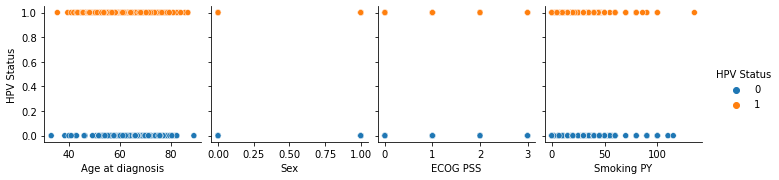

In [93]:
# plot the df with sns pair plot

# plot half by half
sns.pairplot(df,x_vars=X.columns[:4], y_vars=['HPV Status'], hue='HPV Status')

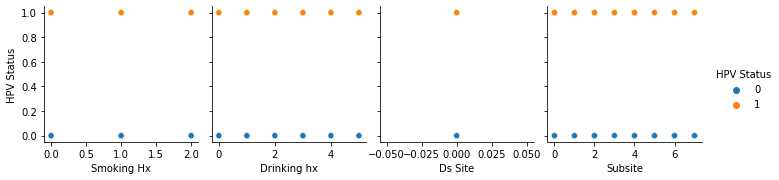

In [94]:
sns.pairplot(df,x_vars=X.columns[4:8], y_vars=['HPV Status'], hue='HPV Status')

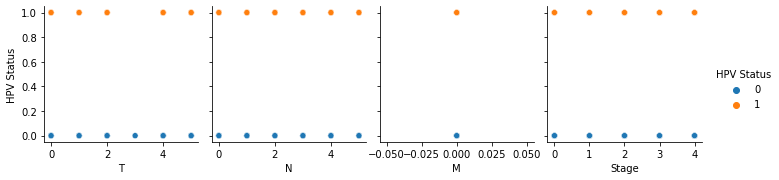

In [95]:
sns.pairplot(df,x_vars=X.columns[8:12], y_vars=['HPV Status'], hue='HPV Status')

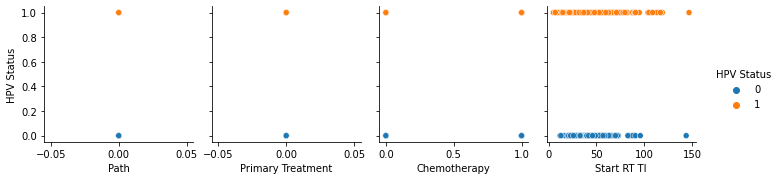

In [96]:
sns.pairplot(df,x_vars=X.columns[12:16], y_vars=['HPV Status'], hue='HPV Status')

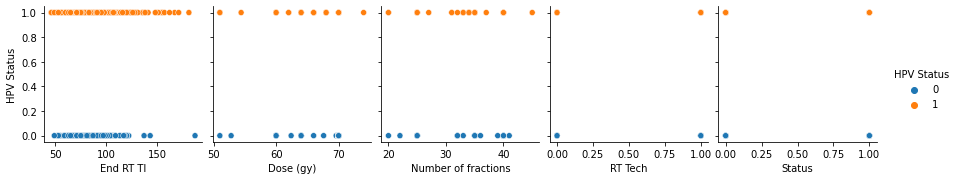

In [97]:
sns.pairplot(df,x_vars=X.columns[16:], y_vars=['HPV Status'], hue='HPV Status')

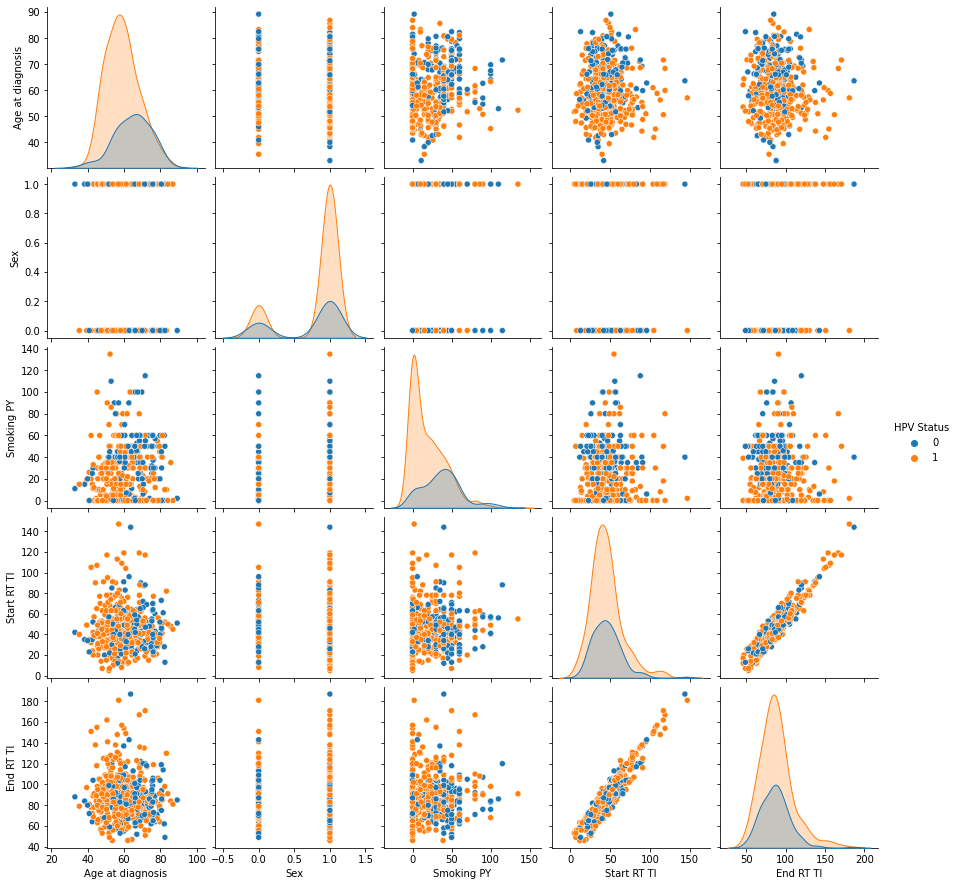

In [98]:
sns.pairplot(df.loc[:, ['Age at diagnosis', 'Sex', 'Smoking PY', 'Start RT TI', 'End RT TI', 'HPV Status']], hue='HPV Status')

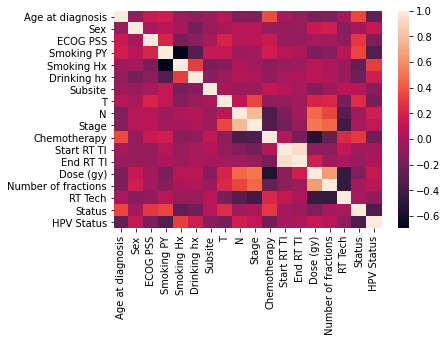

In [ ]:
sns.heatmap(df.corr())

In [99]:
# remove columns if only one label

df.drop(['Ds Site', 'M', 'Path', 'Primary Treatment'], inplace=True, axis=1)

df.head()

,Age at diagnosis,Sex,ECOG PSS,Smoking PY,Smoking Hx,Drinking hx,Subsite,T,N,Stage,Chemotherapy,Start RT TI,End RT TI,Dose (gy),Number of fractions,RT Tech,Status,HPV Status
1,62.57,0,0,50.0,1,2,7,5,4,4,1,35,70,60.0,25.0,0,1,0
2,59.75,0,0,0.0,2,4,4,5,0,4,1,28,55,64.0,40.0,0,0,0
3,60.96,1,0,5.0,0,3,4,1,2,3,1,28,63,60.0,25.0,0,0,1
4,59.73,1,0,40.0,0,3,1,2,0,2,1,41,76,64.0,40.0,0,0,1
7,57.07,0,0,2.0,1,3,4,0,2,3,1,147,181,60.0,25.0,1,0,1


(array([ 2., 19., 57., 66., 78., 62., 34., 23., 12.,  5.]),
 array([35.45555556, 40.594     , 45.73244444, 50.87088889, 56.00933333,
        61.14777778, 66.28622222, 71.42466667, 76.56311111, 81.70155556,
        86.84      ]),
 <a list of 10 Patch objects>)

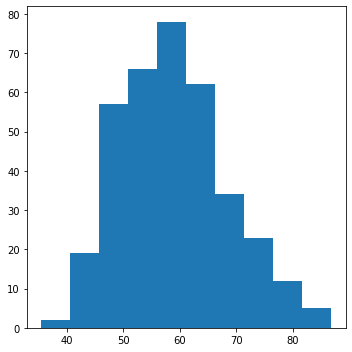

In [116]:
# now plot histogram graph for Age and HPV Status

rcParams['figure.figsize'] = 5, 5

fig, axs = plt.subplots(1, sharey=True, tight_layout=True)

axs.hist(df['Age at diagnosis'][df['HPV Status']==1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


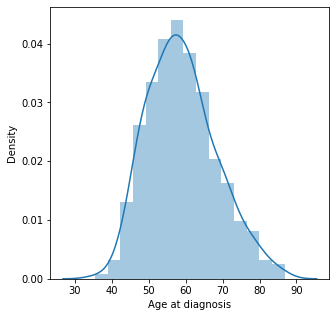

In [119]:
# now plot distribution graph for Age and HPV Status

sns.distplot(df['Age at diagnosis'][df['HPV Status']==1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


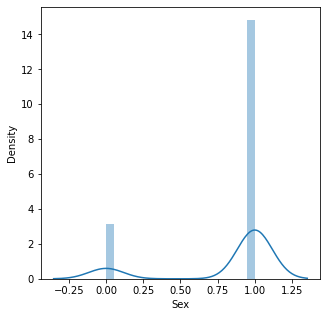

In [120]:
# now plot distribution graph for Sex and HPV Status

sns.distplot(df['Sex'][df['HPV Status']==1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


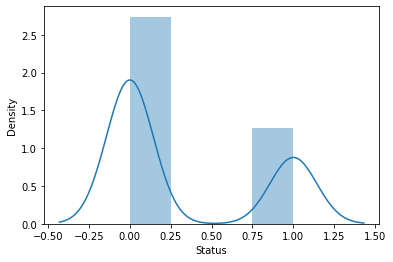

In [48]:
# now plot distribution graph for Status and HPV Status

sns.distplot(df['Status'][df['HPV Status']==1])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sex and HPV Status')

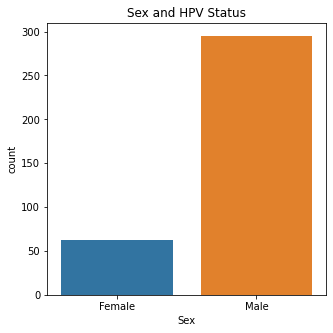

In [121]:
# now plot count graph for Sex and HPV Status

fig, ax = plt.subplots()
sns.countplot(df['Sex'][df['HPV Status']==1], ax=ax)
ax.set_xticklabels(['Female', 'Male'])
ax.set_title('Sex and HPV Status')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Status and HPV Status')

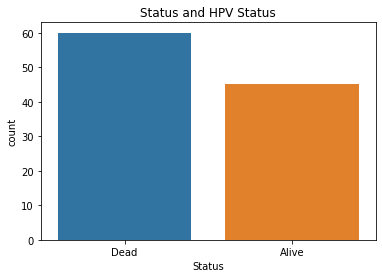

In [ ]:
# now plot count graph for Status and HPV Status

fig, ax = plt.subplots()
sns.countplot(df['Status'][df['Sex']==0], ax=ax)
ax.set_xticklabels(['Dead', 'Alive'])
ax.set_title('Status and HPV Status')

In [ ]:
# len(df['Status'][df['Status']==0])

288

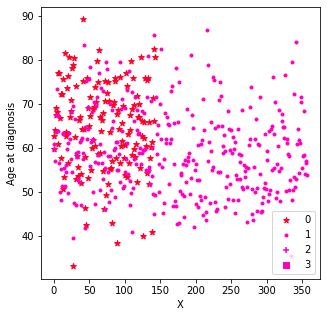

In [122]:
# plot the graph for only some datas to see the difference

markers = ['*', '.', '+', ',']

cmap = plt.cm.gist_rainbow
norm = colors.Normalize(vmin=y.min(), vmax=y.max())

for i in range(4):
    yy = X[y[:] == i]['Age at diagnosis']
    XX = np.arange(len(yy)).reshape((len(yy), 1))

    plt.scatter(XX, yy, color=cmap(norm(i)), marker=markers[i], label=i)
  
plt.xlabel('X')
plt.ylabel('Age at diagnosis')
plt.legend()

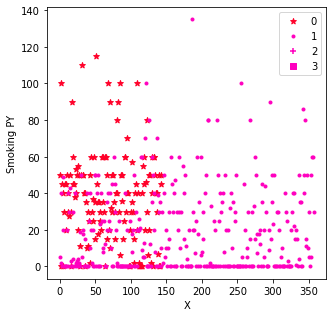

In [123]:
for i in range(4):
    yy = X[y[:] == i]['Smoking PY']
    XX = np.arange(len(yy)).reshape((len(yy), 1))

    plt.scatter(XX, yy, color=cmap(norm(i)), marker=markers[i], label=i)
  
plt.xlabel('X')
plt.ylabel('Smoking PY')
plt.legend()

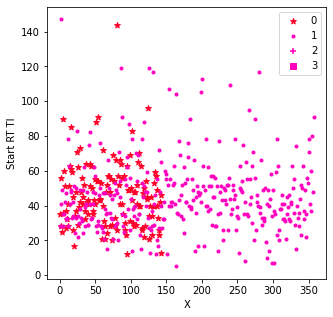

In [124]:
for i in range(4):
    yy = X[y[:] == i]['Start RT TI']
    XX = np.arange(len(yy)).reshape((len(yy), 1))

    plt.scatter(XX, yy, color=cmap(norm(i)), marker=markers[i], label=i)
  
plt.xlabel('X')
plt.ylabel('Start RT TI')
plt.legend()

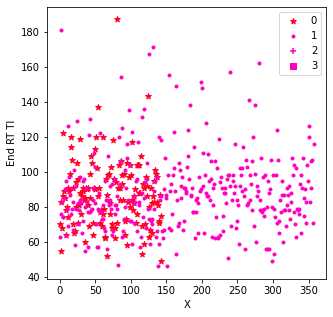

In [125]:
for i in range(4):
    yy = X[y[:] == i]['End RT TI']
    XX = np.arange(len(yy)).reshape((len(yy), 1))

    plt.scatter(XX, yy, color=cmap(norm(i)), marker=markers[i], label=i)
  
plt.xlabel('X')
plt.ylabel('End RT TI')
plt.legend()

# Logistic Regression

In [ ]:
# Logistic Regression

# Logistic regression is the appropriate regression analysis to conduct when the dependent variable is binary.

# When selecting the model for the logistic regression analysis, another important consideration is the model fit.
# Adding independent variables to a logistic regression model will always 
#  increase the amount of variance explained in the log odds (typically expressed as R²).

# Logistic Regression (p) -> log(p(y=1) / 1-(p=1)) = m0 + m1xi1 + m1xi2

C = 1.0

logistic_model = LogisticRegression(C=C, penalty='l1', solver='saga', multi_class='multinomial', max_iter=10000)

logistic_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# now the predict the target using this model

y_logistic_predict = logistic_model.predict(X)

In [ ]:
logistic_model.score(X, y)

0.7749003984063745

In [ ]:
print("\nLogistic Accuracy Score : ", accuracy_score(y, y_logistic_predict))


Logistic Accuracy Score :  0.7749003984063745


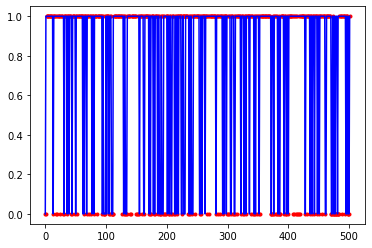

In [ ]:
# plot the predicted value vs actual value

# create dummy dataset X_test for plot the 2D graph

np_test = np.arange(len(y)).reshape((len(y), 1))

plt.scatter(np_test, y, color='red', marker='.')
plt.plot(np_test, y_logistic_predict, color='blue')

# Random Forest Classifier

In [ ]:
# now use random forest classifier to predict the model

# more depth gives more accuracy

# instantiate the RandomForestClassifier

# high max_depth gives more accuracy and take more time

random_forest_classifier_model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=3)

In [ ]:
# fit the X and y with the model

random_forest_classifier_model.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# now the use this model to predict the target data

y_random_forest_classifier_predict = random_forest_classifier_model.predict(X) 

In [ ]:
# now calculate the accuracy of actual and predicted data

print("\n\nRandom Forest Accuracy : ", accuracy_score(y, y_random_forest_classifier_predict), '\n\n')

print(classification_report(y, y_random_forest_classifier_predict))
print(confusion_matrix(y, y_random_forest_classifier_predict))



Random Forest Accuracy :  0.7828685258964143 


              precision    recall  f1-score   support

           0       0.81      0.32      0.46       144
           1       0.78      0.97      0.86       358

    accuracy                           0.78       502
   macro avg       0.79      0.64      0.66       502
weighted avg       0.79      0.78      0.75       502

[[ 46  98]
 [ 11 347]]


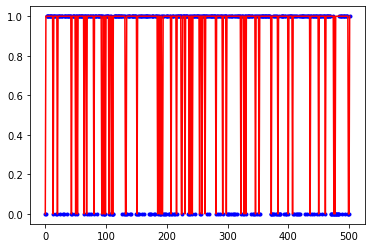

In [ ]:
# now plot the graph for the actual and predicted data

np_test = np.arange(len(y)).reshape((len(y), 1))

plt.scatter(np_test, y, color='blue', marker='.')
plt.plot(np_test, y_random_forest_classifier_predict, color='red')

In [ ]:
# print(df.columns)
# print(X.columns)

target_names = df_0['HPV Status TN']

data.loc[(data['Status'] == 'Alive') & (data['HPV Status'] == 'Not tested'), 'HPV Status'] = 'Negative'

len(target_names[target_names == 'Negative'])


144

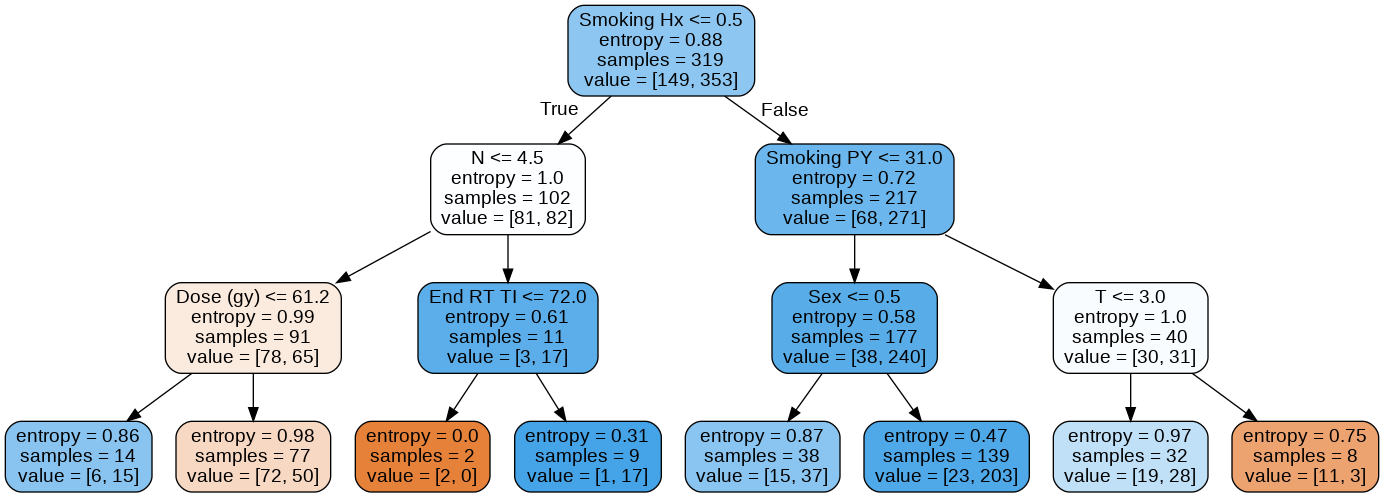

In [ ]:
# now plot the structure of the tree using random forest model

features = list(X.columns)

dot_data = StringIO()

estimator = random_forest_classifier_model.estimators_[5]

export_graphviz(estimator, out_file=dot_data, 
                feature_names= features,
                rounded = True, proportion = False, 
                precision = 2, filled = True
                )

graph = pydot.graph_from_dot_data(dot_data.getvalue())  

Image(graph[0].create_png())  

# Naive Bayes Classifier

In [ ]:
# Naive Bayes

# P(A|B) = P(B|A) * P(A) / P(B)

# P(A) -> Prior Proability
# P(A|B) -> Posterior Proability
 
# The above formula is only for the discrte variables.

# Typically, naive bayes classifier's don't have a problem with continuous input variables.
# essentially, there are different flavors of naive Bayes:
# - Multi-variate Bernoulli Naive Bayes for binary data.
# - Multinomial Naive Bayes for categorical data (a generalization of the Bernoulli Naive Bayes model).
# - Gaussian Naive Bayes for continuous features.

# If variable is continous use Gaussian Naive Bayes.

# Naive Bayes can be extended to real-valued attributes, most commonly by assuming a Gaussian distribution.

# Gaussian Probability Density Function (PDF) -> (1/(sqrt(2*pi)*sd)) * exp(-((x-mean^2) / (2*sd^2))).

# Here we using Naive Bayes Classifier because our target variable is in binary form

# BernoulliNB classifier is suitable for discrete data.

# The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.

# instantiate the BernoulliNB

bernoulli_naive_bayes_model = BernoulliNB()

In [ ]:
# fit the model with X and y

bernoulli_naive_bayes_model.fit(X, y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
# now predict the target using this model

y_bernoulli_naive_bayes_predict = bernoulli_naive_bayes_model.predict(X)

In [ ]:
# now calculate the accuracy of actual and predicted data

print("\n\nNaive Bayes Accuracy : ", accuracy_score(y, y_bernoulli_naive_bayes_predict), '\n\n')

print(classification_report(y, y_bernoulli_naive_bayes_predict))
print(confusion_matrix(y, y_bernoulli_naive_bayes_predict))



Naive Bayes Accuracy :  0.7609561752988048 


              precision    recall  f1-score   support

           0       0.58      0.58      0.58       144
           1       0.83      0.83      0.83       358

    accuracy                           0.76       502
   macro avg       0.71      0.71      0.71       502
weighted avg       0.76      0.76      0.76       502

[[ 84  60]
 [ 60 298]]


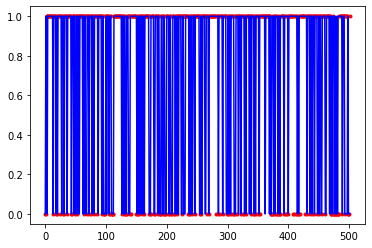

In [ ]:
# now plot the graph for the actual and predicted data

np_test = np.arange(len(y)).reshape((len(y), 1))

plt.scatter(np_test, y, color='red', marker='.')
plt.plot(np_test, y_bernoulli_naive_bayes_predict, color='blue')

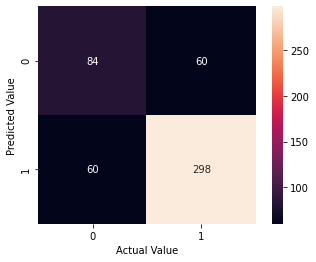

In [ ]:
mat = confusion_matrix(y, y_bernoulli_naive_bayes_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


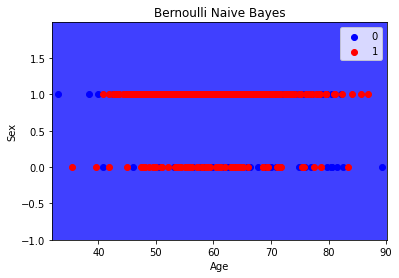

In [ ]:
# now split the df for a particular data visualization

# visualize the Age and Sex with target(HPV Status)

age_sex_df = X.loc[:, ["Age at diagnosis", 'Sex']]

X_set, y_set = np.array(age_sex_df), np.array(y)

# now create the instance of BernoulliNB for the age_sex_df dataset

as_bernoulli_nb_model = BernoulliNB()

# now train the model

as_bernoulli_nb_model.fit(X_set, y_set)

# now create meshgrid for X_set and y_set

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# plot the countours of the predict value
plt.contourf(X1, X2, as_bernoulli_nb_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('blue', 'red')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'red'))(i), label = j)

plt.title('Bernoulli Naive Bayes')
plt.xlabel('Age')
plt.ylabel('Sex')
plt.legend()

# Support Vector Machine

In [49]:
# SVM -> Support Vector Machine

# 1 -> Scalar
# [1,2,..] -> Vector (Like 1D)
# [[1,2,3,...], [1,2,3,...]]  -> Matrix (Like 2D or 3D)
# [[[1,2,3..], [1,2,3...]], [[1,2,3..], [1,2,3...]]] -> Tensor (More than 3D)

# 1D -> Line
# 2D -> Plane
# 3D or more than -> Hyper Plane

# The advantages of support vector machines are:
#     - Effective in high dimensional spaces.
#     - Still effective in cases where number of dimensions is greater than the number of samples.
#     - Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
#     - Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, 
#       but it is also possible to specify custom kernels.

# Length of the Vector -> ||x|| = x21+x22+...+x2n
# Direction of the Vector -> w=(x1||x||,x2||x||), also written as -> w=(cos(θ),cos(α))
# Dot Product -> x⋅y=||x|| ||y|| cos(θ)

# Support Vector Machine

# SVC -> Support Vector Classifier

C = 1.0

# C-Support Vector Classification.
# The strength of the regularization is inversely proportional to C. 
# C Must be strictly positive.

# svm has many kernels like -> rbf, linear, polynomial,..
# kernels have different formulas

# here we use only three kernels -> rbf, linear, polynomial

# create separate model instance for each kernel

# RBF -> Radial Basis Function kernel

# RBF Kernel SVC
rbf_svc_model = SVC(kernel = 'rbf', C=C)

# Linear Kernel SVC
linear_svc_model = SVC(kernel = 'linear', C=C)

# Polynomial Kernel SVC
poly_svc_model = SVC(kernel = "poly", degree=3, C=C)

# degree -> degree of the polynomial

In [50]:
# now train each model with X and y

rbf_svc_model.fit(X, y)
linear_svc_model.fit(X, y)
poly_svc_model.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
# now test each model with X

y_rbf_svc_predict = rbf_svc_model.predict(X)
y_linear_svc_predict = linear_svc_model.predict(X)
y_poly_svc_predict = poly_svc_model.predict(X)

In [57]:
# get the score of each model

print("\n\nRBF SVM Accuracy : ", accuracy_score(y, y_rbf_svc_predict), "\n")
print("\nLinear SVM Accuracy : ", accuracy_score(y, y_linear_svc_predict), "\n")
print("\nPolynomial SVM Accuracy : ", accuracy_score(y, y_poly_svc_predict), "\n\n")



RBF SVM Accuracy :  0.7111553784860558 


Linear SVM Accuracy :  0.7808764940239044 


Polynomial SVM Accuracy :  0.7330677290836654 





RBF Kernel--------------------------------------------->
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       144
           1       0.71      1.00      0.83       358

    accuracy                           0.71       502
   macro avg       0.36      0.50      0.42       502
weighted avg       0.51      0.71      0.59       502



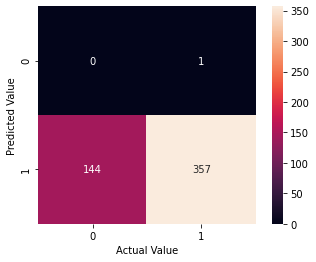

In [58]:
# now get classification report and confusion matrix for each kernel

# RBF Kernel
print("\nRBF Kernel--------------------------------------------->")
print(classification_report(y, y_rbf_svc_predict))

# plot the RBF Kernel confusion matrix accuracy

mat = confusion_matrix(y, y_rbf_svc_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value');


Linear Kernel--------------------------------------------->
              precision    recall  f1-score   support

           0       0.64      0.53      0.58       144
           1       0.82      0.88      0.85       358

    accuracy                           0.78       502
   macro avg       0.73      0.71      0.72       502
weighted avg       0.77      0.78      0.77       502

[[ 76  68]
 [ 42 316]]


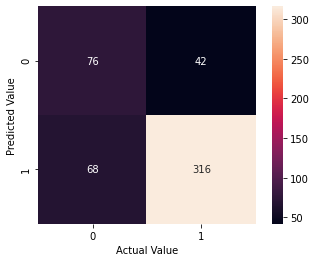

In [60]:
# Linear Kernel
print("\nLinear Kernel--------------------------------------------->")
print(classification_report(y, y_linear_svc_predict))
print(confusion_matrix(y, y_linear_svc_predict))

# plot the Linear Kernel confusion matrix accuracy

mat = confusion_matrix(y, y_linear_svc_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value');


Polynomial Kernel----------------------------------------->
              precision    recall  f1-score   support

           0       0.73      0.11      0.19       144
           1       0.73      0.98      0.84       358

    accuracy                           0.73       502
   macro avg       0.73      0.55      0.52       502
weighted avg       0.73      0.73      0.65       502

[[ 16 128]
 [  6 352]]


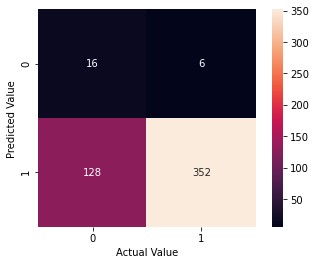

In [59]:
# Polynomial Kernel
print("\nPolynomial Kernel----------------------------------------->")
print(classification_report(y, y_poly_svc_predict))
print(confusion_matrix(y, y_poly_svc_predict))

# plot the Polynomial Kernel confusion matrix accuracy

mat = confusion_matrix(y, y_poly_svc_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value');

In [61]:
# now plot the graph for each kernel

# create dummy dataset X_test for plot the 2D graph

np_test = np.arange(len(y)).reshape((len(y), 1))

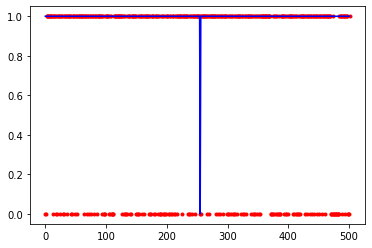

In [62]:
# RBF Kernel
plt.scatter(np_test, y, color='red', marker='.')
plt.plot(np_test, y_rbf_svc_predict, color='blue')

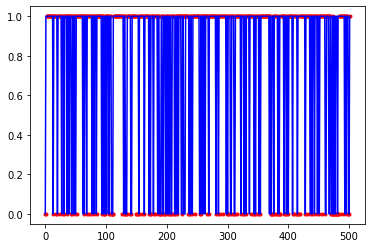

In [63]:
# Linear Kernel
plt.scatter(np_test, y, color='red', marker='.')
plt.plot(np_test, y_linear_svc_predict, color='blue')

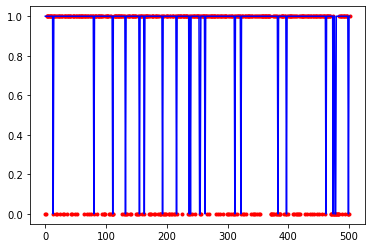

In [64]:
# Polynomial Kernel
plt.scatter(np_test, y, color='red', marker='.')
plt.plot(np_test, y_poly_svc_predict, color='blue')

# KNN Classifier
KNN -> K - Nearest Neighbour

In [66]:
# K-NN is a type of classification, where the function is only 
#  approximated locally and all computation is deferred until function evaluation.

# k is a user-defined constant, and an unlabeled vector (a query or test point) is 
#  classified by assigning the label which is most frequent among the k training samples nearest to that query point.

# The k-nearest neighbour classifier can be viewed as assigning the k nearest neighbours a weight 1/k and all others 0 weight.
# This can be generalised to weighted nearest neighbour classifiers.

# K nearest neighbors is a simple algorithm that stores all available cases and 
#  classifies new cases based on a similarity measure (e.g., distance functions).

# A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its 
#  K nearest neighbors measured by a distance function.
# If K = 1, then the case is simply assigned to the class of its nearest neighbor.

# Euclidean distance
# use ED to find the distance of two points

# the Euclidean distance from p to q is the number -> 1D -> d(p,q)=|p-q|, 2D -> d(p,q)= sqrt((q1-p1)^2)+(q2-p2)^2)

# now create the instance of KNN with 4 neighbours

knn_model = KNeighborsClassifier(n_neighbors=4)

In [67]:
# now train the model

knn_model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [68]:
# now test the model

y_knn_predict = knn_model.predict(X)

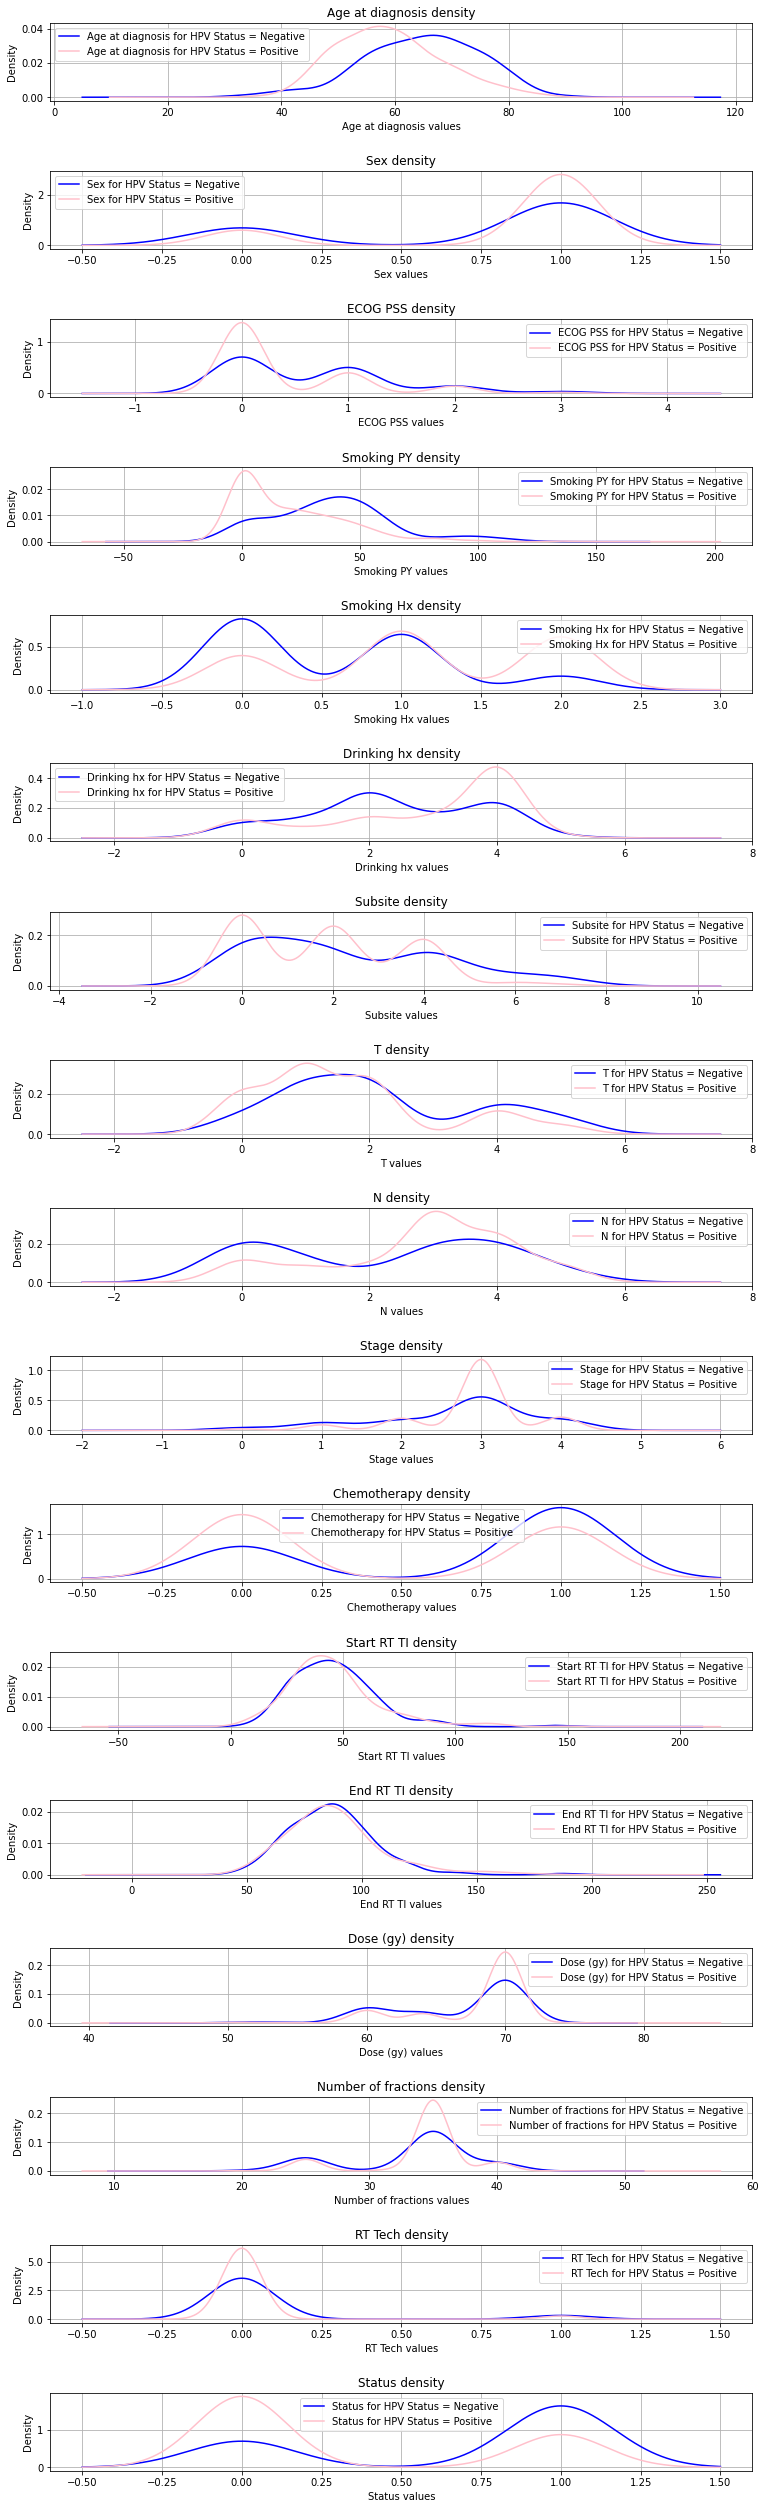

In [148]:
# Plot features densities depending on the outcome values

names = list(df.columns)

# change fig size to fit all subplots beautifully 
rcParams['figure.figsize'] = 15, 40

# separate data based on outcome values 
negative = df[df['HPV Status'] == 0]
positive = df[df['HPV Status'] == 1]

# init figure
fig, axs = plt.subplots(len(names)-1)
plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 0.95, wspace = 0.2, hspace = 0.9)

# plot densities for outcomes
for column_name in names[:-1]: 
    ax = axs[names.index(column_name)]
    negative[column_name].plot(kind='density', ax=ax, subplots=True, sharex=False, color="blue", legend=True, label=column_name + ' for HPV Status = Negative')
    positive[column_name].plot(kind='density', ax=ax, subplots=True,  sharex=False, color="pink", legend=True, label=column_name + ' for HPV Status = Positive')
    ax.set_xlabel(column_name + ' values')
    ax.set_title(column_name + ' density')
    ax.grid('on')

In [150]:
# now get the score of the predict values using knn

knn_model.score(X, y)

0.8127490039840638

In [152]:
# now get the score of predicted values using metrics accuracy score

print("\n\nKNN Accuracy : ", accuracy_score(y, y_knn_predict), '\n\n')



KNN Accuracy :  0.8127490039840638 


